In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15)

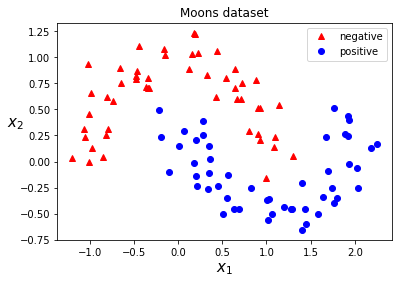

In [3]:
import matplotlib.pyplot as plt

plt.figure('Moons dataset')
plt.title('Moons dataset')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='negative')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', label='positive')
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15, rotation=False)
plt.legend()
plt.show()

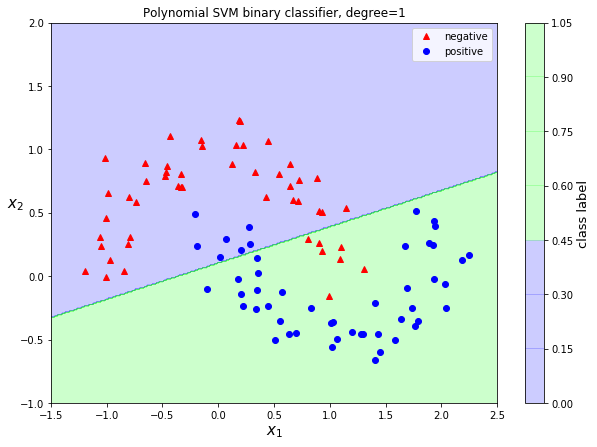

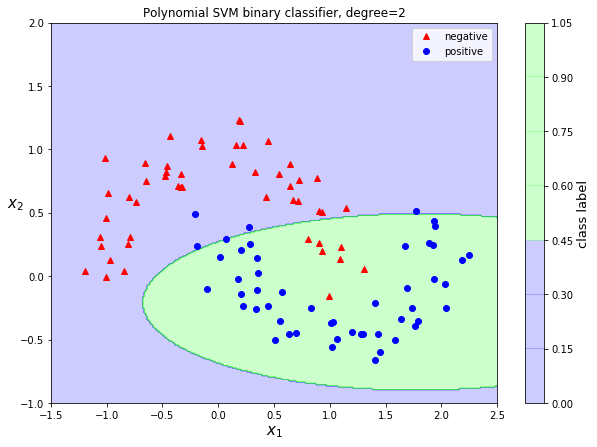

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


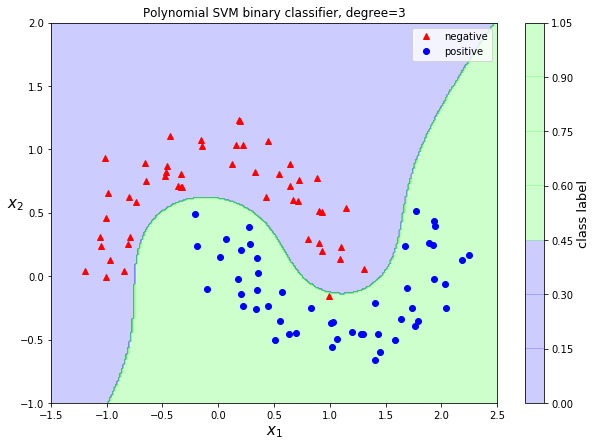

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


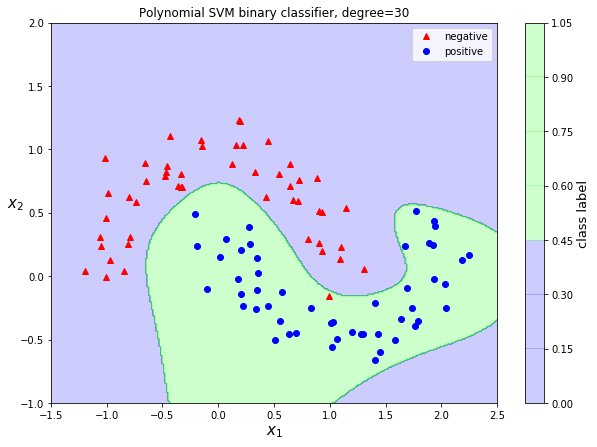

In [4]:
import numpy as np

# Step 1: Polynomial model to classify non-linear dataset.

for degree in [1, 2, 3, 30]:
    poly_svm_clf = Pipeline([
        ('poly-features', PolynomialFeatures(degree=degree)),
        ('std-scaler', StandardScaler()),
        ('svm-classifier', LinearSVC(C=10, loss='hinge', max_iter=2000))
    ])
    
    poly_svm_clf.fit(X, y)
    
    x0, x1 = np.meshgrid(np.linspace(-1.5, 2.5, 300),
                         np.linspace(-1.0, 2.0, 300))
    features = np.c_[x0.ravel(), x1.ravel()]
    y_pred = poly_svm_clf.predict(features).reshape(x0.shape)
    y_decision = poly_svm_clf.decision_function(features).reshape(x0.shape)

    title = 'Polynomial SVM binary classifier, degree=%d' % degree
    plt.figure(title, figsize=(10, 7))
    plt.title(title)
    # Draw decision boundary
    num_colors = 2
    cmap = plt.cm.get_cmap('brg', num_colors)
    label_map = plt.contourf(x0, x1, y_pred, cmap=cmap, alpha=0.2)
    class_label_cbar = plt.colorbar(label_map)
    class_label_cbar.ax.set_ylabel('class label', fontsize=13)
    # Draw dataset
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='negative')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', label='positive')
    plt.xlabel(r'$x_1$', fontsize=15)
    plt.ylabel(r'$x_2$', fontsize=15, rotation=False)
    plt.legend()
    plt.show()

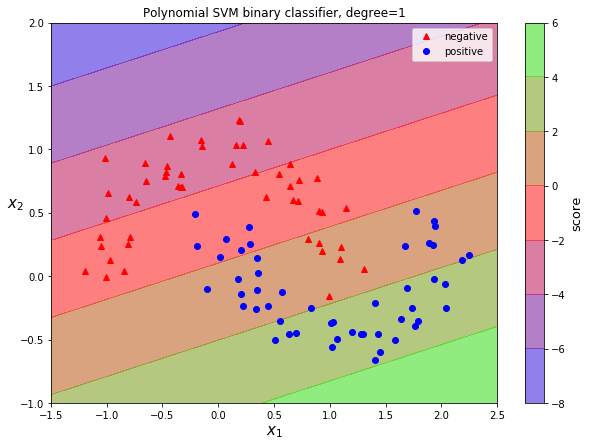

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


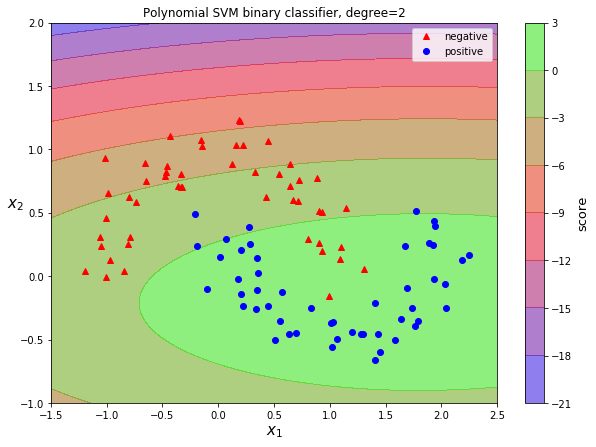

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


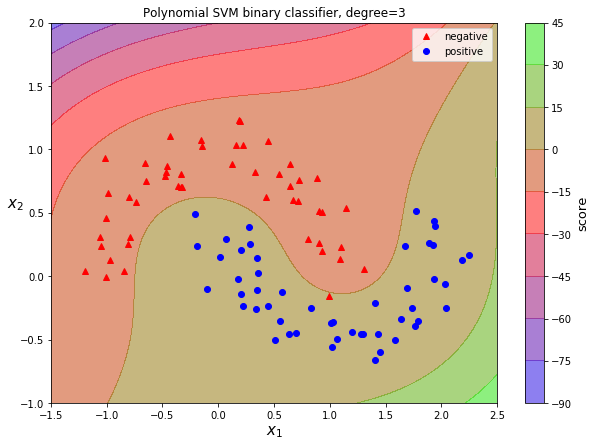

/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


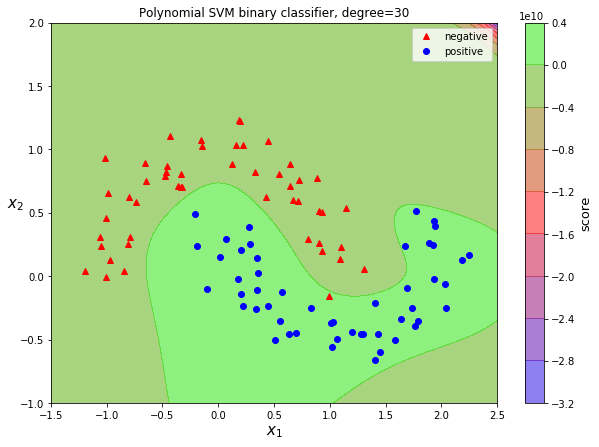

In [5]:
for degree in [1, 2, 3, 30]:
    poly_svm_clf = Pipeline([
        ('poly-features', PolynomialFeatures(degree=degree)),
        ('std-scaler', StandardScaler()),
        ('svm-classifier', LinearSVC(C=10, loss='hinge', max_iter=2000))
    ])
    
    poly_svm_clf.fit(X, y)
    
    x0, x1 = np.meshgrid(np.linspace(-1.5, 2.5, 300),
                         np.linspace(-1.0, 2.0, 300))
    features = np.c_[x0.ravel(), x1.ravel()]
    y_pred = poly_svm_clf.predict(features).reshape(x0.shape)
    y_decision = poly_svm_clf.decision_function(features).reshape(x0.shape)

    title = 'Polynomial SVM binary classifier, degree=%d' % degree
    plt.figure(title, figsize=(10, 7))
    plt.title(title)
    # Draw a score map
    score_map = plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.5)
    score_cbar = plt.colorbar(score_map)
    score_cbar.ax.set_ylabel('score', fontsize=13)
    # Draw dataset
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='negative')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', label='positive')
    plt.xlabel(r'$x_1$', fontsize=15)
    plt.ylabel(r'$x_2$', fontsize=15, rotation=False)
    plt.legend()
    plt.show()

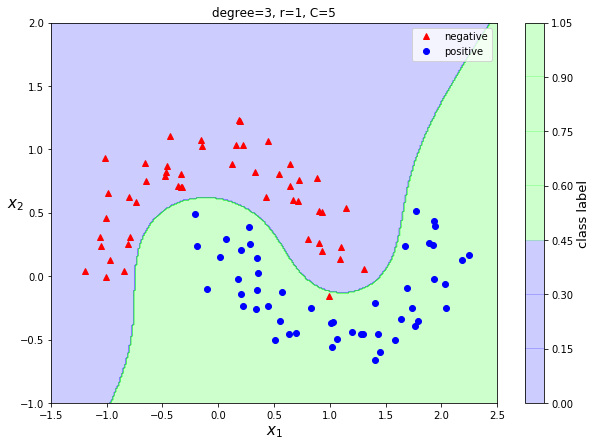

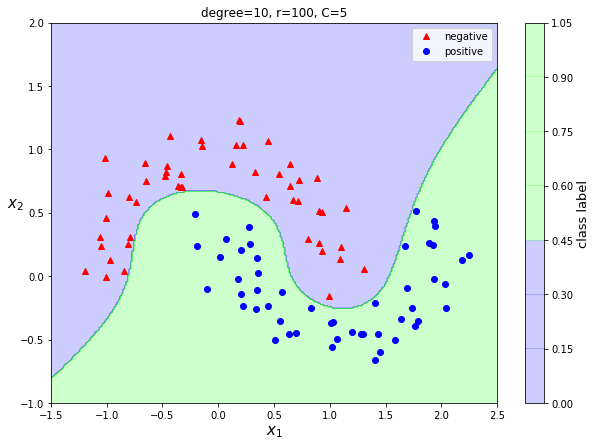

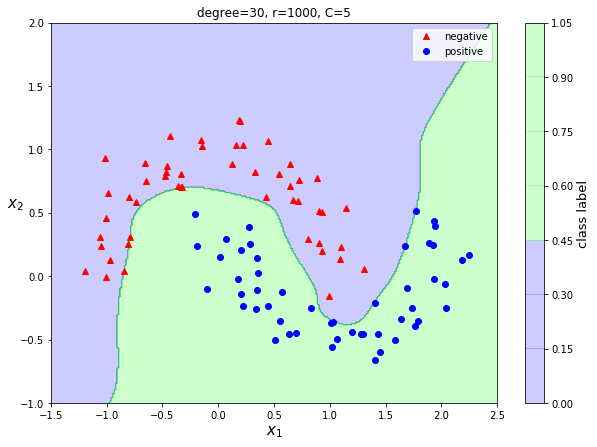

In [12]:
from sklearn.svm import SVC

# Step 2: Kernel trick

for degree, r, C in [(3,1,5), (10,100,5), (30,1000,5)]:
    poly_kernel_svm_clf = Pipeline([
        ('std-scaler', StandardScaler()),
        ('svm-classifier', SVC(kernel='poly', degree=degree, coef0=1, C=5))
    ])

    poly_kernel_svm_clf.fit(X, y)

    x0, x1 = np.meshgrid(np.linspace(-1.5, 2.5, 300),
                         np.linspace(-1.0, 2.0, 300))
    features = np.c_[x0.ravel(), x1.ravel()]
    y_pred = poly_kernel_svm_clf.predict(features).reshape(x0.shape)
    y_decision = poly_kernel_svm_clf.decision_function(features).reshape(x0.shape)

    title = 'degree=%d, r=%s, C=%s' % (degree, r, C)
    plt.figure(title, figsize=(10, 7))
    plt.title(title)
    # Draw decision boundary
    num_colors = 2
    cmap = plt.cm.get_cmap('brg', num_colors)
    label_map = plt.contourf(x0, x1, y_pred, cmap=cmap, alpha=0.2)
    class_label_cbar = plt.colorbar(label_map)
    class_label_cbar.ax.set_ylabel('class label', fontsize=13)
    # Draw dataset
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='negative')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', label='positive')
    plt.xlabel(r'$x_1$', fontsize=15)
    plt.ylabel(r'$x_2$', fontsize=15, rotation=False)
    plt.legend()
    plt.show()

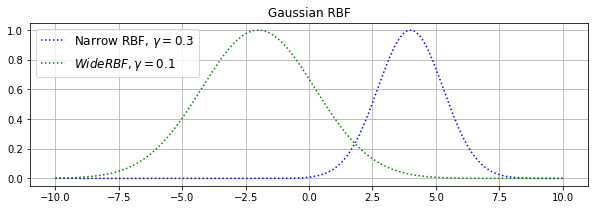

In [35]:
# Step 3: Gaussian RBF, Radial Basis Function

gaussian_rbf = lambda x, landmark, gamma: np.exp(-gamma*np.linalg.norm(x-landmark, axis=1)**2)
x = np.linspace(-10, 10, 200).reshape(-1, 1)
narrow_bell = gaussian_rbf(x, landmark=4, gamma=0.3)
wide_bell = gaussian_rbf(x, landmark=-2, gamma=0.1)

# Small gamma makes a shape of bell wide.

plt.figure('Gaussian RBF', figsize=(10, 3))
plt.title('Gaussian RBF')
plt.plot(x, narrow_bell, 'b:', label=r'Narrow RBF, $\gamma={}$'.format(0.3))
plt.plot(x, wide_bell, 'g:', label=r'$Wide RBF, \gamma={}$'.format(0.1))
plt.legend(fontsize=12)
plt.grid()
plt.show()

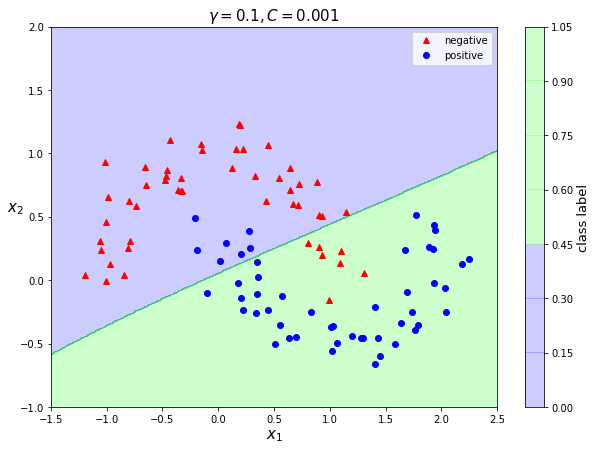

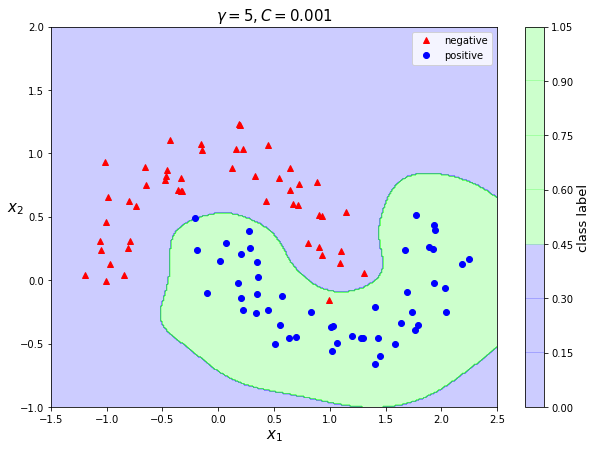

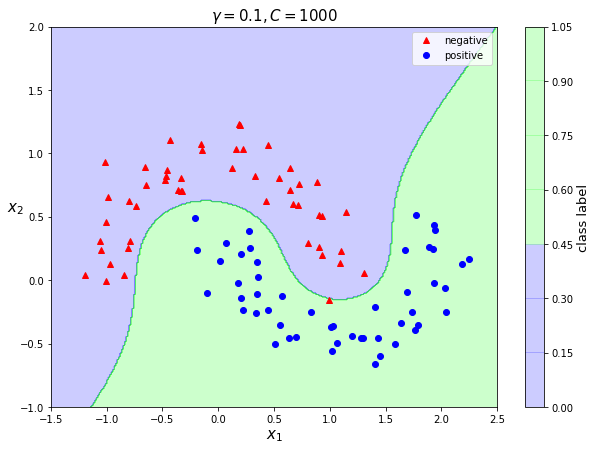

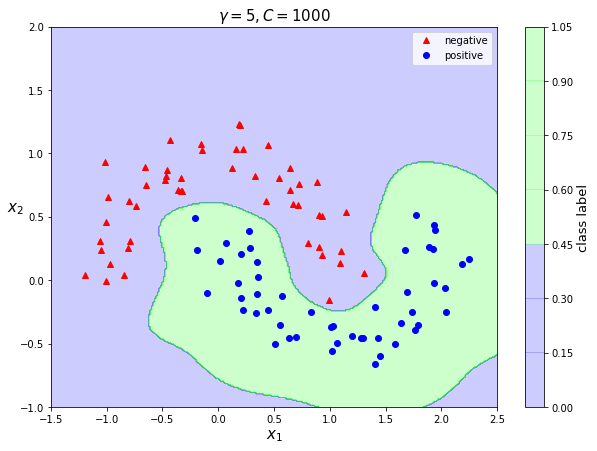

In [40]:
# Bigger gamma makes a shape of bell narrow.
# It makes that the decision boundary has more curly shape.

hyper_parameters = [(0.1, 0.001), (5, 0.001), (0.1, 1000), (5, 1000)]
for gamma, C in hyper_parameters:
    rbf_kernel_svm_clf = Pipeline([
        ('std-scaler', StandardScaler()),
        ('svm-classifier', SVC(kernel='rbf', gamma=gamma, C=C))
    ])
    
    rbf_kernel_svm_clf.fit(X, y)
    
    x0, x1 = np.meshgrid(np.linspace(-1.5, 2.5, 300),
                         np.linspace(-1.0, 2.0, 300))
    features = np.c_[x0.ravel(), x1.ravel()]
    y_pred = rbf_kernel_svm_clf.predict(features).reshape(x0.shape)
    y_decision = rbf_kernel_svm_clf.decision_function(features).reshape(x0.shape)

    title = r'$\gamma={}, C={}$'.format(gamma, C)
    plt.figure(title, figsize=(10, 7))
    plt.title(title, fontsize=15)
    # Draw decision boundary
    num_colors = 2
    cmap = plt.cm.get_cmap('brg', num_colors)
    label_map = plt.contourf(x0, x1, y_pred, cmap=cmap, alpha=0.2)
    class_label_cbar = plt.colorbar(label_map)
    class_label_cbar.ax.set_ylabel('class label', fontsize=13)
    # Draw dataset
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='negative')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo', label='positive')
    plt.xlabel(r'$x_1$', fontsize=15)
    plt.ylabel(r'$x_2$', fontsize=15, rotation=False)
    plt.legend()
    plt.show()